In [249]:
import cv2
from facenet_pytorch import MTCNN
import matplotlib.pyplot as plt
import time
import torch


detect_face = MTCNN(selection_method="probability", margin=32, post_process=False)

# Dispose turning on camera (using 30fps, change if needed)
capture = cv2.VideoCapture(0)
time.sleep(2)
ret, image = capture.read(0)

capture.release()


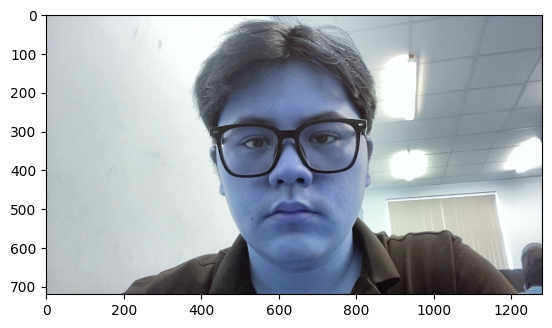

In [250]:
plt.imshow(image)

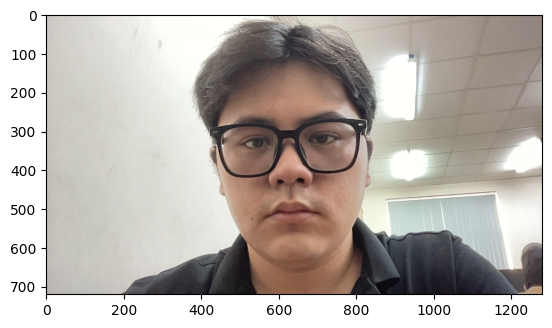

In [251]:
# Convert to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
down_sample = cv2.resize(image, (480, 480))
# Show me a magic again
plt.imshow(image)

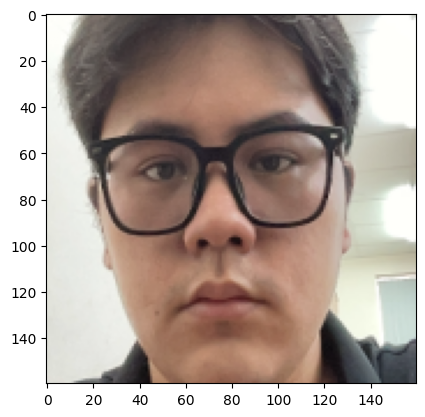

In [252]:


face_image = detect_face(down_sample) / 255

plt.imshow((face_image).permute(1, 2, 0))

tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.4706, 0.4863, 0.4588],
         [1.0000, 1.0000, 1.0000,  ..., 0.4745, 0.4745, 0.4549],
         [1.0000, 1.0000, 1.0000,  ..., 0.4745, 0.4824, 0.4588]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.4863, 0.5059, 0.4863],
         [1.0000, 1.0000, 1.0000,  ..., 0.4941, 0.4941, 0.4784],
         [1.0000, 1.0000, 1.0000,  ..., 0.4941, 0.5020, 0.4824]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 0.9922],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

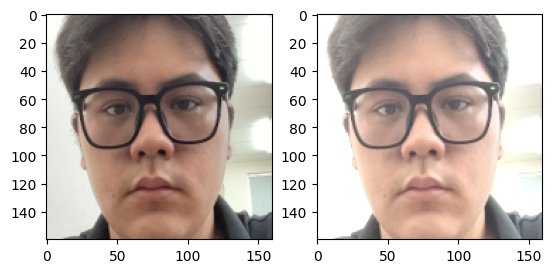

In [253]:
import torchvision.transforms as ts

# Now we transform this method

transforms = ts.Compose([
  # ts.Resize((300, 300)),
  ts.Lambda(lambda x: x + 0.2),  # Adjust the brightness
  ts.Lambda(lambda x: torch.clamp(x, 0, 1)),  # Clamp values to ensure they are within [0, 1]
])

transformed_image = transforms(face_image)

# Apply a threshold to create a binary mask
threshold = .2 
binary_mask = transformed_image > threshold


# Create a new image with black background
result_np = transformed_image.clone()
result_np[~binary_mask] = 0  # Set background to black

print(transformed_image)
# Show this magic image
plt.subplot(1, 2, 1)
plt.imshow(face_image.permute(1, 2, 0), cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(result_np.permute(1, 2,0), cmap="gray")

In [254]:
from facenet_pytorch import InceptionResnetV1
net = InceptionResnetV1(pretrained="vggface2").eval()

embeddings = net(result_np.unsqueeze(0))
torch.cdist(embeddings, embeddings)

tensor([[0.]], grad_fn=<CdistBackward0>)

In [258]:
import os
from PIL import Image
toTensors = ts.ToTensor()

files = os.listdir('./sample')

for idx, _file in enumerate(files):
  
  try:
    filepath = os.path.join('sample', _file)
    current_image = Image.open(filepath)
    current_image = current_image.resize([300, 300])
    face = detect_face(current_image)
    # print(face / 255)
    # plt.imshow((face / 255).permute(1, 2, 0))
    current_image = transforms(face/255)
    embeddings_2 = net(current_image.unsqueeze(0))
    cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
    similarity = cos(embeddings, embeddings_2)
    print("%s (%f) %s" % (_file, similarity, True if similarity > .60 else False))
    
    # if idx == 0:
    #   break
  except:
    # print("[!]  Got some error to read file %s" % (_file))
    continue
  

taylor.jpeg (0.062444) False
face.jpg (0.707224) True
face2.jpg (0.688307) True
nguyen4.jpg (0.778014) True
ajlama.png (0.132756) False
tuanngoc.jpg (0.371753) False
nguyen2.jpg (0.623154) True
nguyen3.jpg (0.678310) True
nguyen1.jpg (0.688307) True
jbb.jpg (0.207188) False
